## CIS 242

## Spring 2020

## HOMEWORK ASSIGNMENT 1

This notebook contains some more advanced Python code.  

You need to add a comment to each indicated cell explaining what the code in that cell is doing.  You do NOT need to comment each line.  

You should execute each cell even if there is no requirement to add a comment.  You are welcome to add additional code or markdown cells as you find helpful. 

You may use whatever external resources you like.  If you borrow ANY text or code from a website, book, or other resource, you must cite it.  Just noting the URL is fine.

#### Active notebooks (.ipynb files) or raw code (.py files) will NOT be accepted and no points will be given.

This assignment is worth **10 points**.  You will lose 1/2 point for each missing or incorrect answer.

**The assignment is due at 4:45pm on January 23rd.  Assignments submitted after that will lose 50% of the grade.  Assignments submitted after midnight on January 24 will not be accepted.**

#### Many thanks to Sean Paddock of Rockhurst University for letting me steal his awesome notebooks


In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Now we’ll look at an example that has some real problems that you’ll likely experience all the time during your analysis and work.

So lets get started!

Let’s go ahead and open up the running_data.csv

The data set that we're going to work with is a slice of 
http://stat-computing.org/dataexpo/2009/



In [2]:
#what is this code doing? 
cols = ['Year', 'Month', 'DayofMonth', 'DayOfWeek','DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 
        'UniqueCarrier', 'FlightNum', 'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 
        'AirTime', 'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut', 
        'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
        'SecurityDelay', 'LateAircraftDelay']
#It's creating a list of column variables in the form of a list.

df = pd.read_csv('june_airplane_data.csv', names= cols, index_col = False)
#Using pandas read_csv function to import csv file and assigning column variable names defined as 'cols' to 'names'.

In [3]:
df.head()
#head() function returns the first n number of rows of the dataset, where n is 5 by default.

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1994,6,5,7,1542.0,1540,1819.0,1815,US,236,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,1994,6,6,1,1549.0,1540,1831.0,1815,US,236,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,1994,6,7,2,1540.0,1540,1803.0,1815,US,236,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,1994,6,8,3,1541.0,1540,1808.0,1815,US,236,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,1994,6,9,4,1541.0,1540,1835.0,1815,US,236,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [4]:
df.describe()
"""pandas' describe() function provides a descriptive statistics summary of the dataset, including number of data points, mean, 
standard deviation, minimum, maximum, upper/lower quartiles, and 50th percentile.""" 

"pandas' describe() function provides a descriptive statistics summary of the dataset, including number of data points, mean, \nstandard deviation, minimum, maximum, upper/lower quartiles, and 50th percentile."

Now we've got a new issue, we've got a problem with our date time that we'd like to merge. There are two ways to do this, I'll show you the easiest one - the other one would involve combining them into one column then parsing the results. Let's do it the  easier way with read_csv. We can specify parse dates as a dictionary where we map the columns to a date time list.

In [5]:
# what is this code doing?
df = pd.read_csv('june_airplane_data.csv', parse_dates={'Date':['Year','Month','DayofMonth']}, names= cols, index_col = False)
#parse_date identifies 'Year', 'Month', and 'DayofMonth' as dates by assigning them as values of the 'Date' dictionary.

In [6]:
df.head()

,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1994-06-05,7,1542.0,1540,1819.0,1815,US,236,NaN,157.0,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,1994-06-06,1,1549.0,1540,1831.0,1815,US,236,NaN,162.0,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,1994-06-07,2,1540.0,1540,1803.0,1815,US,236,NaN,143.0,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,1994-06-08,3,1541.0,1540,1808.0,1815,US,236,NaN,147.0,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,1994-06-09,4,1541.0,1540,1835.0,1815,US,236,NaN,174.0,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN


Now one that can be helpful in analysis is binning, we've gotten our dates sorted out, but we might want to take a look at some specific groups of data. That's where binning comes in. Let's give it a try. Now this is different than grouping because we're not working on a continuous scale so we've got to be a bit arbitary.

Now let's start by setting up something to group things by time. We can see we've got a departure time and arrival time column that is going to be useful. Right now they're in Army time format. It may be nice to break them up into 6 hour chunks, from midnight to 6 am, 6 to noon, noon to 1800, then 1800 to midnight

Introducing the 'cut' function

In [7]:
# what is this code doing?
ranges = [0,600,1200,1800,2400] #slices the 24 hour time frame into 6-hour long frames
labels = ['Early Morning','Morning','Early Afternoon','Evening'] #labels corresponding to each time frame defined above
df['DepTime2'] = pd.cut(df.DepTime, ranges, labels=labels).astype('category') 
#creates column 'DepTime2' and labels DepTime depending on which range it falls in as defined by 'ranges' variable and passes it as categorical data type.
df['ArrTime2'] = pd.cut(df.ArrTime, ranges, labels=labels).astype('category') 
#creates column 'ArrTime2' and labels ArrTime depending on which range it falls in as defined by 'ranges' variable and passes it as categorical data type.

In [8]:
df.head()

,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepTime2,ArrTime2
0,1994-06-05,7,1542.0,1540,1819.0,1815,US,236,NaN,157.0,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,Early Afternoon,Evening
1,1994-06-06,1,1549.0,1540,1831.0,1815,US,236,NaN,162.0,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,Early Afternoon,Evening
2,1994-06-07,2,1540.0,1540,1803.0,1815,US,236,NaN,143.0,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,Early Afternoon,Evening
3,1994-06-08,3,1541.0,1540,1808.0,1815,US,236,NaN,147.0,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,Early Afternoon,Evening
4,1994-06-09,4,1541.0,1540,1835.0,1815,US,236,NaN,174.0,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,Early Afternoon,Evening


In [9]:
df.ArrTime2.head(10)
#displays the 'ArrTime2' column for the top 10 rows of the dataset.

0    Evening
1    Evening
2    Evening
3    Evening
4    Evening
5    Evening
6    Evening
7    Evening
8    Evening
9    Evening
Name: ArrTime2, dtype: category
Categories (4, object): [Early Morning < Morning < Early Afternoon < Evening]

Now categorical data is different than what we're used to, we can see that it has a hierarchy. There's things that are less than other things and therefore is ordered. This can come in handy in certain types of analysis.

Really what this allows us to do is describe the data in terms of those categories

In [10]:
df[['DepTime2','ArrTime2']].describe()
#provides a numerical summary of the categorical values including count, how many categorical values there are, and what the most frequently occuring category is.

,DepTime2,ArrTime2
count,423805,422641
unique,4,4
top,Morning,Early Afternoon
freq,163514,156806


Let's try to answer a specific question. When flights leave and arrive, what is the average delay time? Now these are for actual departure and arrival times, not the scheduled ones. That's a different time entirely.

For example, If a flight leaves in the early morning and arrives in the early morning, what is the typical delay? Is there a longer departure delay or arrival delay?

In [11]:
# what is this code doing?
print(df.groupby(['DepTime2', 'ArrTime2'])[['DepDelay','ArrDelay']].mean())
#df.groupby(['DepTime2', 'ArrTime2'] categorizes the departure time and arrival time frames by labels.
#[['DepDelay','ArrDelay']].mean() displays the mean value for each catoegory.

df.groupby(['DepTime2', 'ArrTime2']).agg({'ArrDelay':[np.mean, np.std], 'DepDelay':[np.mean, np.std]})
#groups the dataframe by category and then aggregates the mean and standard deviation under each category.

#the difference in presenation between the two tables is due to the print() statement in the first line and no print() statement in the second line.

                                  DepDelay   ArrDelay
DepTime2        ArrTime2                             
Early Morning   Early Morning    43.804627  42.069923
                Morning           2.578566   2.109582
                Early Afternoon        NaN        NaN
                Evening          64.000000  61.333333
Morning         Early Morning          NaN        NaN
                Morning           2.367489   0.664017
                Early Afternoon   3.769618   4.102513
                Evening           5.411565  12.923469
Early Afternoon Early Morning     8.890995  14.450237
                Morning           4.896104   2.480519
                Early Afternoon   5.166529   4.571237
                Evening           7.632955  11.082200
Evening         Early Morning    36.956347  42.037799
                Morning           5.464702   7.629198
                Early Afternoon  29.142857  22.500000
                Evening          13.668750  12.756813


ArrDelay              DepDelay           
                                      mean        std       mean        std
DepTime2        ArrTime2                                                   
Early Morning   Early Morning    42.069923  91.241073  43.804627  91.836738
                Morning           2.109582  18.436171   2.578566  16.595306
                Evening          61.333333   5.507571  64.000000   8.888194
Morning         Morning           0.664017  13.453101   2.367489  10.216042
                Early Afternoon   4.102513  17.172703   3.769618  12.482494
                Evening          12.923469  24.192638   5.411565  15.704599
Early Afternoon Early Morning    14.450237  42.653210   8.890995  27.347542
                Morning           2.480519  11.084140   4.896104   8.718680
                Early Afternoon   4.571237  18.710938   5.166529  14.861790
                Evening          11.082200  28.073863   7.632955  19.324282
Evening         Early Morning    42.037799  74.136225  36.956347  65.635363
                Morning           7.629198  17.129908   5.464702  12.298888
                Early Afternoon  22.500000  30.933552  29.142857  32.229602
                Evening          12.756813  34.126398  13.668750  39.551075

#### Can we rank these data by average delay time?

We want to use total delay time for our ranking. 

In [14]:
# what is this code doing?
df['TotalDelay'] = df.ArrDelay + df.DepDelay
df['ScheduledDepTime'] = pd.cut(df.CRSDepTime, ranges, labels=labels)
#creates two additional columns each named 'TotalDelay' and 'ScheduledDepTime'.
#'TotalDelay' column is the sum of ArrDelay and DepDelay of the data frame.
#creates 'ScheduledDepTime' column that reads float values from the 'CRSDepTime' and assigns the categorical value as defined by 'ranges' before.
#by doing so, the data points are cut and sorted into bins/categories.

def average_delay(dataframe):
    dataframe['AvgFlightDelay'] = dataframe.TotalDelay.mean()
    return dataframe
#a function that calculates the average delay time by calculating the mean of the passed argument, which is df.TotalDelay.
#the calculated value is then assigned to a column named 'AvgFlightDelay'

avg_delayed = df.groupby('FlightNum').apply(average_delay)
print(avg_delayed.tail(10))
#groups the data points by 'FlightNum' and displays the average delay time of a given flight number.
#because the average delay time is grouped by each flight number, the value for the average delay time for a given flight number is the same.
#tail(10) displays the last 10 rows of the data frame.

             Date  DayOfWeek  DepTime  CRSDepTime  ArrTime  CRSArrTime  \
426480 1994-06-08          3   1500.0        1435   1554.0        1530   
426481 1994-06-09          4   1445.0        1435   1532.0        1530   
426482 1994-06-10          5   1438.0        1435   1531.0        1530   
426483 1994-06-12          7   1435.0        1435   1524.0        1530   
426484 1994-06-13          1   1433.0        1435   1522.0        1530   
426485 1994-06-14          2   1435.0        1435   1528.0        1530   
426486 1994-06-15          3   1446.0        1435   1537.0        1530   
426487 1994-06-16          4   1440.0        1435   1530.0        1530   
426488 1994-06-17          5   1456.0        1435   1554.0        1530   
426489 1994-06-19          7   1443.0        1435   1540.0        1530   

       UniqueCarrier  FlightNum  TailNum  ActualElapsedTime  ...  \
426480            CO       1720      NaN               54.0  ...   
426481            CO       1720      NaN         

In [18]:
# what is this code doing?
def ranking(dataframe, column):
    dataframe.sort_values(column, ascending=False,inplace=True)
    dataframe[column + "Rank"] = np.arange(len(dataframe)) + 1
    return dataframe
"""creates a function that sorts the rows in order of 'column' argument value in descending order so that the row with the highest
value in a given column is listed on top."""

avg_delayed_ranked = avg_delayed.groupby('ScheduledDepTime').apply(lambda x: ranking(x, 'AvgFlightDelay'))
#instead of flight number, this time the data points are grouped by 'ScheduledDepTime' and included in the data frame as column 'AvgFlightDelay'.
#apply/lambda function, takes 'AvgFlightDelay' as parameter, groups it by 'ScheduledDepTime', and ranks them in order from highest average flight delay time to lowest for each time frame category.
avg_delayed_ranked[avg_delayed_ranked.AvgFlightDelayRank == 1]
#The flight with the highest average flight delay time is ranked as first (AvgFlightDelayRank == 1) in each time frame label.
#It is then returned as shown in the table below.

,,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepTime2,ArrTime2,TotalDelay,ScheduledDepTime,AvgFlightDelay,AvgFlightDelayRank
ScheduledDepTime,,,,,,,,,,,,,,,,,,,,,,
Early Morning,269530,1994-06-02,4,51.0,110,109.0,131,DL,1490,NaN,18.0,...,NaN,NaN,NaN,NaN,Early Morning,Early Morning,-41.0,Early Morning,36.875000,1
Morning,267020,1994-06-28,2,1158.0,1151,1253.0,1250,DL,1428,NaN,55.0,...,NaN,NaN,NaN,NaN,Morning,Early Afternoon,10.0,Morning,173.780142,1
Early Afternoon,60742,1994-06-12,7,1605.0,1600,1703.0,1659,US,2849,NaN,58.0,...,NaN,NaN,NaN,NaN,Early Afternoon,Early Afternoon,9.0,Early Afternoon,183.333333,1
Evening,266946,1994-06-09,4,1953.0,2005,2022.0,2039,DL,1428,NaN,29.0,...,NaN,NaN,NaN,NaN,Evening,Evening,1411.0,Evening,173.780142,1


In [19]:
df = pd.read_csv('raw_running_data.csv')
#imports the cvs file 'raw_running_data'.
print(type(df))
#prints the type of data frame.
print(df.shape)
#prints the dimension of data frame.
df.head(10)
#returns the top 10 rows of data frame.

<class 'pandas.core.frame.DataFrame'>
(81, 3)


,Date,Miles,Time
0,8/2/14,1.70,NaN
1,8/3/14,1.40,NaN
2,8/4/14,2.10,NaN
3,8/6/14,2.38,NaN
4,8/7/14,2.30,NaN
5,8/8/14,3.40,NaN
6,8/9/14,2.50,NaN
7,8/10/14,3.36,0:28:37
8,8/11/14,1.67,0:13:07
9,8/12/14,1.42,0:10:35


In [20]:
df.dtypes
#returns the data type of each varaible/column.

Date      object
Miles    float64
Time      object
dtype: object

Now for a little background on this dataset. This is exercise data from august 1st 2014 to January 1st 2015. During these several months the runner recorded the distance every time he ran and recorded the time the majority of the time that took as well.

In [21]:
print(df.columns)
#prints the names used as column varaibles.
print(df.head())
#prints the top 5 rows of the data frame.
df['Date'].head()
#returns the dates of the top 5 rows.

Index(['Date', 'Miles', 'Time'], dtype='object')
     Date  Miles Time
0  8/2/14   1.70  NaN
1  8/3/14   1.40  NaN
2  8/4/14   2.10  NaN
3  8/6/14   2.38  NaN
4  8/7/14   2.30  NaN


0    8/2/14
1    8/3/14
2    8/4/14
3    8/6/14
4    8/7/14
Name: Date, dtype: object

In [22]:
# what is this code doing? 
df = pd.read_csv('raw_running_data.csv', parse_dates=['Date'])
#imports the raw csv file 'raw_running_data.csv' and parses the dates.
df.set_index('Date', inplace=True)
#sets the index of the data frame based on 'Date' column.
df.head(10)
#returns the top 10 rows of the data frame.

,Miles,Time
Date,,
2014-08-02,1.70,NaN
2014-08-03,1.40,NaN
2014-08-04,2.10,NaN
2014-08-06,2.38,NaN
2014-08-07,2.30,NaN
2014-08-08,3.40,NaN
2014-08-09,2.50,NaN
2014-08-10,3.36,0:28:37
2014-08-11,1.67,0:13:07


Let’s go ahead and plot it.

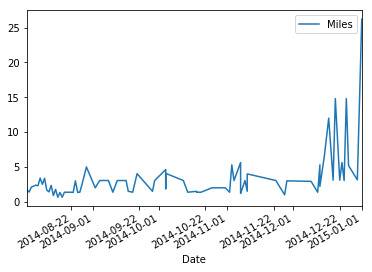

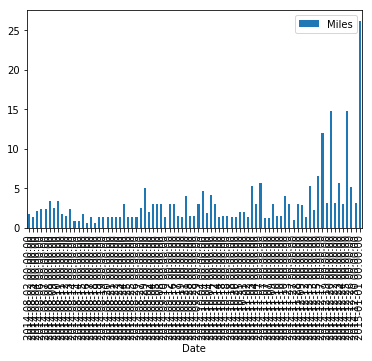

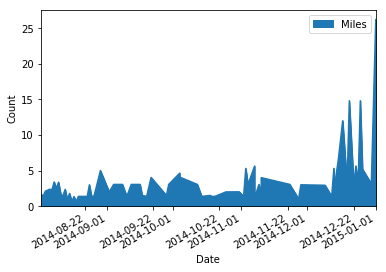

In [25]:
# what is this code doing? 
df.plot()
#plots the data points.
plt.show()
#shows the plot.

df.plot(kind='bar')
#creates a bar graph.
plt.show()


df.plot(kind='area')
#creates an area graph.
plt.ylabel("Count")
#adds 'Count' as y-axis label.
plt.show()

In [19]:
df.describe()
#provides a descriptive statistics summary of the dataset.

,Miles
count,81.000000
mean,3.137531
std,3.634519
min,0.650000
25%,1.370000
50%,2.100000
75%,3.050000
max,26.200000


There's something very irregular about these data.

Well the problem is that our data is recorded on inconsistent days. You’ll see dates that have multiple entries and others that don’t have any entry at all. For instance November.

In [20]:
# what is this code doing? 
df['2014-11']
#fethces the data points where the index of the data, which is the date, starts with '2014-11'.

,Miles,Time
Date,,
2014-11-02,1.37,0:08:43
2014-11-03,5.30,0:39:26
2014-11-04,3.05,0:22:12
2014-11-07,5.63,0:49:05
2014-11-07,1.26,NaN
2014-11-07,1.20,NaN
2014-11-09,3.05,0:22:36
2014-11-10,1.50,0:09:00
2014-11-10,1.50,0:11:33


In [21]:
# what is this code doing? 
len(df['2014-11'])
#number of data points with this index.

13

This kind of thing comes up time and time again in data analysis. You’re analyzing some data trying to get patterns out of it, you notice some weird inconsistencies and then realize the data was collected in a strange way. However pandas makes it easy to fill in those gaps.

In [26]:
# what is this code doing? 
from datetime import datetime
start = datetime(2014,8,2)
end = datetime(2015,1,1)
print(start, end)
d = pd.DataFrame(index=pd.date_range(start, end))
print(d.shape)
#prints the dimension of the data frame composed of data points that within the assigned date range.
d.head()
#inputs date range as parameters and retrieves the top five dates (or indices in this case).

2014-08-02 00:00:00 2015-01-01 00:00:00
(153, 0)


""
2014-08-02
2014-08-03
2014-08-04
2014-08-05
2014-08-06


Of course there are multiple ways to perform this operation but let's describe it using joins to illustrate import concepts. 

#### Joins. A join is like a SQL join or a venn diagram.

<img src="http://i.stack.imgur.com/GbJ7N.png" />

In [27]:
df.head(10)

,Miles,Time
Date,,
2014-08-02,1.70,NaN
2014-08-03,1.40,NaN
2014-08-04,2.10,NaN
2014-08-06,2.38,NaN
2014-08-07,2.30,NaN
2014-08-08,3.40,NaN
2014-08-09,2.50,NaN
2014-08-10,3.36,0:28:37
2014-08-11,1.67,0:13:07


In [24]:
# what is this code doing? 
df = df.join(d, how='outer')
#outer joins d to the rest of the data frame df where the pre-assinged date range is used as primary keys/joints to extract data correlated to the primary keys.
print(df.shape)
#prints the dimension of the data frame.
df.head()

(166, 2)


,Miles,Time
2014-08-02,1.70,NaN
2014-08-03,1.40,NaN
2014-08-04,2.10,NaN
2014-08-05,NaN,NaN
2014-08-06,2.38,NaN


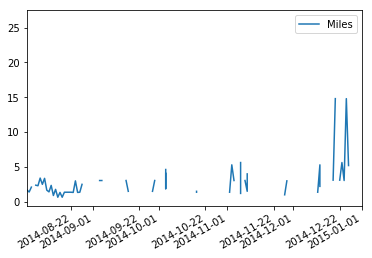

In [25]:
df.plot()
plt.show()

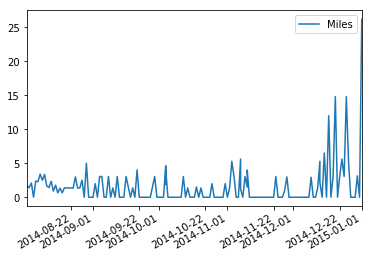

In [26]:
#what does this code do?
df.Miles.fillna(0,inplace=True)
#replaces 'NaN' values with 0 to fill in the gaps in the plot.

df.plot()
plt.show()
